In [834]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder,StandardScaler, Normalizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline  import Pipeline
# Still yet to import SMOTE work with that too
from xgboost import XGBClassifier

In [835]:
df = pd.read_csv('./datasets/titanic/train.csv');

In [836]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [837]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [839]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [840]:

#sns.displot(data = age_classes, x = 'Fare', hue = 'Survived', kde = True);#


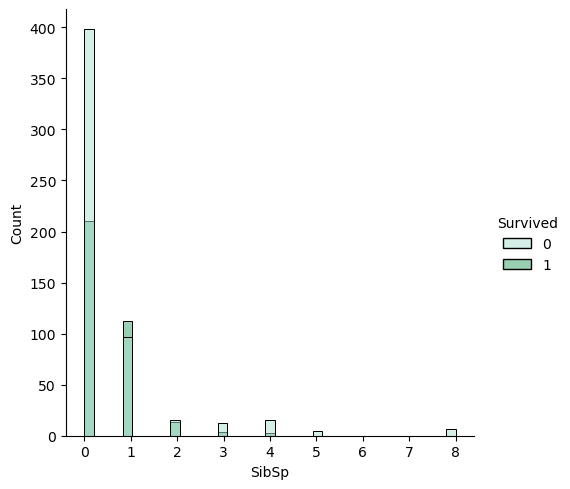

In [841]:
sns.displot(data = df, x = 'SibSp', hue = 'Survived',palette = 'BuGn' )

In [842]:
df_dropped = df.drop(['Name','Cabin','Ticket', 'PassengerId'], axis = 1)

In [843]:
df_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [844]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [845]:
df.corr()

C:\Users\kviriyala\AppData\Local\Temp\ipykernel_62592\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [846]:
def age_imputer(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        return int(df_dropped[df_dropped['Pclass'] == pclass]['Age'].mean())
    return age

In [847]:
df_dropped['Age'] = df_dropped[['Age','Pclass']].apply(age_imputer, axis = 1)


In [848]:
df_dropped['Age'] = pd.cut(df_dropped['Age'], bins=[1, 10, 20, 40, 60,
                                          80])


In [849]:
df_dropped['Age']

0      (20, 40]
1      (20, 40]
2      (20, 40]
3      (20, 40]
4      (20, 40]
         ...   
886    (20, 40]
887    (10, 20]
888    (20, 40]
889    (20, 40]
890    (20, 40]
Name: Age, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(1, 10] < (10, 20] < (20, 40] < (40, 60] < (60, 80]]

<Axes: xlabel='Age', ylabel='count'>

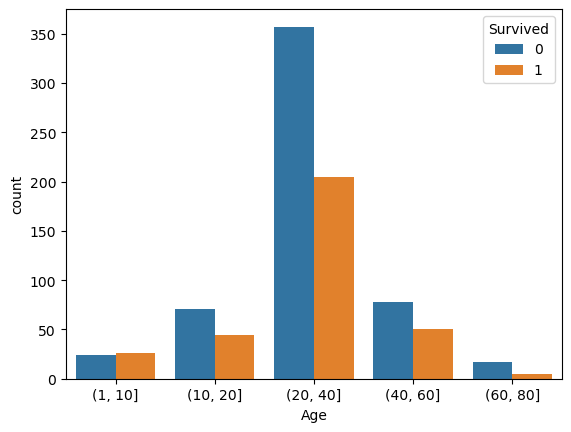

In [850]:
sns.countplot(data = df_dropped, x = 'Age', hue = 'Survived')

In [851]:
def age_class(x):
    if x > 60:
        return 4
    elif x > 30:
        return 3
    elif x > 10:
        return 2
    return 1

def fare_class(x):
    if x > 150:
        return 3
    if x > 50:
        return 2
    return 1


def sib_class(x):
    if x > 2:
        return 1
    if x == 0:
        return 2
    return 3


def parch_class(x):
    if x > 1:
        return 2
    return x

In [852]:


# df_dropped['Age'] = df_dropped['Age'].apply(age_class)
# df_dropped['Age'].value_counts()

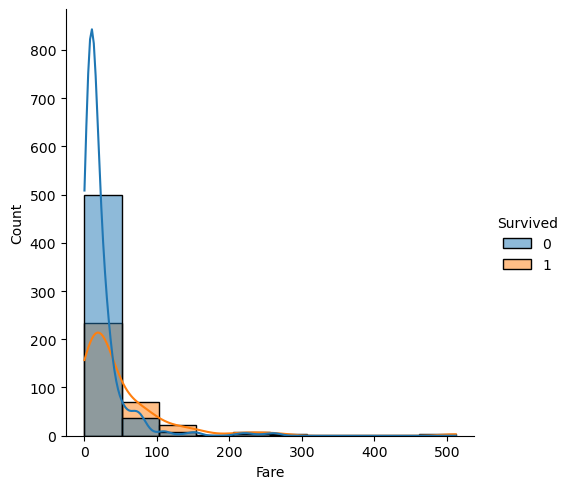

In [853]:
sns.displot(data = df, x=  'Fare', hue = 'Survived', bins = 10, kde = True)

In [854]:
#df_dropped['Fare'] = df_dropped['Fare'].apply(fare_class)
#df_dropped['Fare'].value_counts()

In [855]:
# df_dropped['SibSp'] = df_dropped['SibSp'].apply(sib_class)
# df_dropped['SibSp'].value_counts()

In [856]:
#df_dropped['Parch'] = df_dropped['Parch'].apply(parch_class)

In [857]:
#df_dropped['Family'] = df_dropped['Parch'] + df_dropped['SibSp'] 
#df_dropped.drop(['SibSp','Parch'], axis = 1, inplace = True)

<Axes: xlabel='Embarked', ylabel='count'>

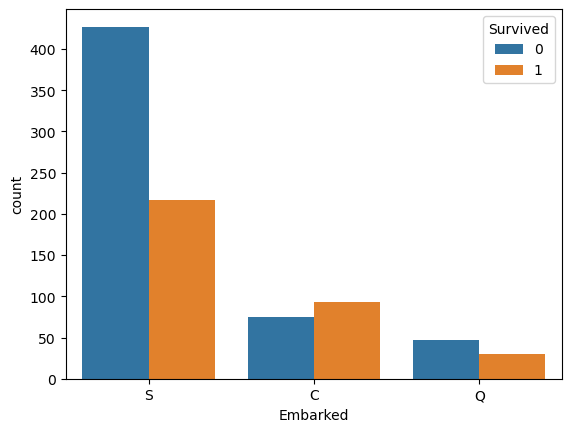

In [858]:
sns.countplot(data = df_dropped, x= 'Embarked', hue = 'Survived')

In [859]:
df_dropped.corr()

C:\Users\kviriyala\AppData\Local\Temp\ipykernel_62592\871342251.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dropped.corr()


,Survived,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000


<Axes: xlabel='Parch', ylabel='Count'>

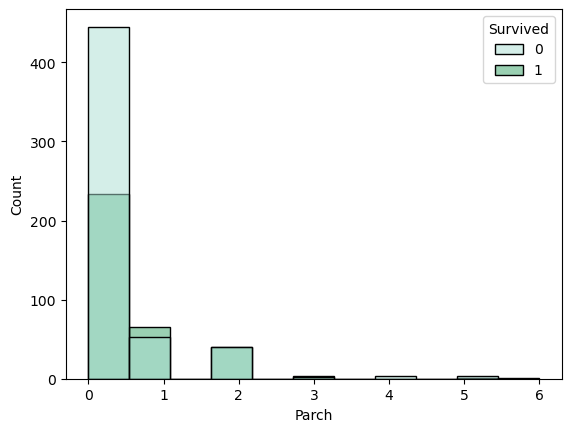

In [860]:
sns.histplot(data = df, x= 'Parch', hue = 'Survived', palette = 'BuGn')

In [861]:
df_dropped.corr()

C:\Users\kviriyala\AppData\Local\Temp\ipykernel_62592\871342251.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dropped.corr()


,Survived,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000


<Axes: >

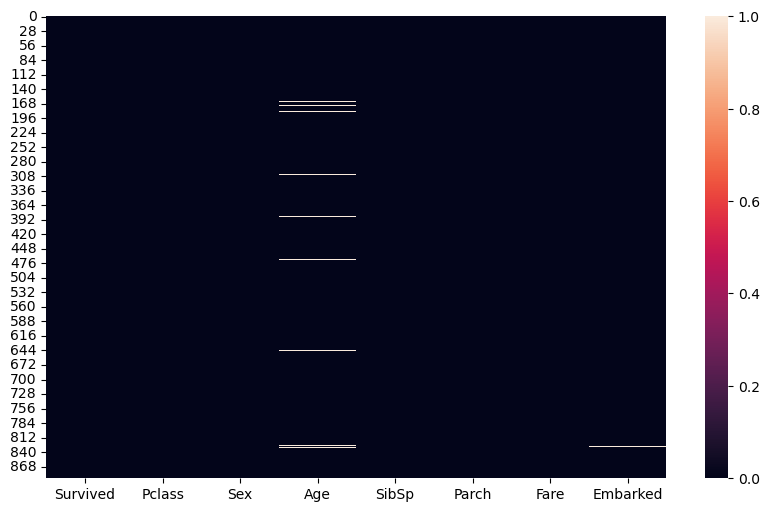

In [862]:

plt.figure(figsize=(10,6))
sns.heatmap(df_dropped.isna())

In [863]:
df_dropped.dropna(subset = ['Embarked'], inplace = True)

In [894]:
X = df_dropped.drop('Survived', axis = 1)
y = df_dropped['Survived']


In [895]:
categorical_columns = df_dropped.select_dtypes(['object','category']).columns.to_list()


In [896]:
df_dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,"(20, 40]",1,0,7.2500,S
1,1,1,female,"(20, 40]",1,0,71.2833,C
2,1,3,female,"(20, 40]",0,0,7.9250,S
3,1,1,female,"(20, 40]",1,0,53.1000,S
4,0,3,male,"(20, 40]",0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,"(20, 40]",0,0,13.0000,S
887,1,1,female,"(10, 20]",0,0,30.0000,S
888,0,3,female,"(20, 40]",1,2,23.4500,S
889,1,1,male,"(20, 40]",0,0,30.0000,C


In [897]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [898]:
categorical_columns

['Sex', 'Age', 'Embarked']

In [899]:
column_transformer = ColumnTransformer([('one_hot', OneHotEncoder(),categorical_columns)],remainder='passthrough')

In [900]:
X = pd.get_dummies(X, drop_first = True)

In [901]:
np.random.seed(101)
over = SMOTE( random_state = 101)
under = RandomUnderSampler(random_state = 101)
pipe = Pipeline(steps  = [
    #('column_transformer', column_transformer),
    ('o', over),
    ('u', under),
    #('standard_scaler', StandardScaler())
    #('normalizer', Normalizer())
])

In [902]:
pd.concat([X,y], axis = 1).corr()

,Pclass,SibSp,Parch,Fare,Sex_male,"Age_(10, 20]","Age_(20, 40]","Age_(40, 60]","Age_(60, 80]",Embarked_Q,Embarked_S,Survived
Pclass,1.000000,0.081656,0.016824,-0.548193,0.127741,0.101120,0.098365,-0.256881,-0.129124,0.220558,0.076466,-0.335549
SibSp,0.081656,1.000000,0.414542,0.160887,-0.116348,0.023454,-0.131171,-0.064180,-0.053770,-0.026692,0.069438,-0.034040
Parch,0.016824,0.414542,1.000000,0.217532,-0.247508,0.004232,-0.192427,0.004157,-0.018661,-0.081585,0.061512,0.083151
Fare,-0.548193,0.160887,0.217532,1.000000,-0.179958,-0.019922,-0.050066,0.084647,0.023283,-0.116684,-0.163758,0.255290
Sex_male,0.127741,-0.116348,-0.247508,-0.179958,1.000000,-0.039610,0.043405,-0.000521,0.083339,-0.075217,0.121405,-0.541585
"Age_(10, 20]",0.101120,0.023454,0.004232,-0.019922,-0.039610,1.000000,-0.504107,-0.158085,-0.059955,-0.047198,0.020201,0.000124
"Age_(20, 40]",0.098365,-0.131171,-0.192427,-0.050066,0.043405,-0.504107,1.000000,-0.536361,-0.203420,0.111140,-0.064663,-0.050634
"Age_(40, 60]",-0.256881,-0.064180,0.004157,0.084647,-0.000521,-0.158085,-0.536361,1.000000,-0.063791,-0.092119,0.030660,0.006897
"Age_(60, 80]",-0.129124,-0.053770,-0.018661,0.023283,0.083339,-0.059955,-0.203420,-0.063791,1.000000,0.004769,0.013053,-0.061443
Embarked_Q,0.220558,-0.026692,-0.081585,-0.116684,-0.075217,-0.047198,0.111140,-0.092119,0.004769,1.000000,-0.499261,0.004536


In [903]:
np.random.seed(101)
#X = column_transformer.fit_transform(X)
x1, y1 = pipe.fit_resample(X, y)

In [904]:
np.random.seed(101)
x1 = RobustScaler().fit_transform(x1)
#X = RobustScaler().fit_transform(X)

In [905]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state = 101)
np.random.seed(101)
results = {}
models = {'LogisticRegression': LogisticRegression(),'RandomForestClassifier': RandomForestClassifier(), 'SVC': SVC(kernel='rbf'), 'AdaBoost': AdaBoostClassifier(), 'XGBoost': XGBClassifier()}
for name,model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.score(X_test, y_test)

In [906]:
results

{'LogisticRegression': 0.8109090909090909,
 'RandomForestClassifier': 0.8145454545454546,
 'SVC': 0.8254545454545454,
 'AdaBoost': 0.8363636363636363,
 'XGBoost': 0.850909090909091}

In [907]:
    print(classification_report(y_test, models['XGBoost'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       146
           1       0.83      0.86      0.84       129

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



In [935]:
np.random.seed(101)
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.794 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.762 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.805 total time=   0.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.799 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.788 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.1s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [937]:
np.random.seed(101)
param_grid2 = {
    'n_estimators': [ 100, 150],
    'max_features': ['sqrt', None],
    'max_depth': [6, 9],
    'max_leaf_nodes': [ 6, 9],
    'min_samples_split': [1.0, 2],
    'min_samples_leaf': [0.5, 1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid2,
                           verbose = 3)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.3s
[CV 3/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=100;, score=0.512 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=100;, score=0.512 total time=   0.4s
[CV 1/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=150;, score=0.509 total tim

[CV 4/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.774 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.4s
[CV 1/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.770 total time=   0.6s
[CV 2/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.842 total time=   0.7s
[CV 3/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.776 total time=   0.7s
[CV 4/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.774 total time=   0.6s
[CV 5/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=6, min_samples_l

[CV 2/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.5s
[CV 3/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.6s
[CV 4/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=1.0, n_estimators=150;, score=0.512 total time=   0.6s
[CV 5/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=1.0, n_estimators=150;, score=0.512 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.776 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=sqrt, max_leaf_nodes=9, min_s

[CV 5/5] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.793 total time=   0.9s
[CV 1/5] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.4s
[CV 2/5] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.4s
[CV 3/5] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.512 total time=   0.4s
[CV 5/5] END max_depth=6, max_features=None, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.512 total time=   0.4s
[CV 1/5] END max_depth=6, max_features=None, max_leaf_nodes=6, min

[CV 3/5] END max_depth=6, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.782 total time=   0.4s
[CV 4/5] END max_depth=6, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.780 total time=   0.5s
[CV 5/5] END max_depth=6, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.5s
[CV 1/5] END max_depth=6, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.794 total time=   0.7s
[CV 2/5] END max_depth=6, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.836 total time=   0.8s
[CV 3/5] END max_depth=6, max_features=None, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.782 total time=   0.7s
[CV 4/5] END max_depth=6, max_features=None, max_leaf_nodes=9, min_samples_l

[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.6s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.6s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1.0, n_estimators=150;, score=0.512 total time=   0.6s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=1.0, n_estimators=150;, score=0.512 total time=   0.6s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.770 total time=   0.4s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=6, min

[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=2, n_estimators=150;, score=0.512 total time=   0.6s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=2, n_estimators=150;, score=0.512 total time=   0.7s
[CV 1/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.3s
[CV 2/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.4s
[CV 3/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=1.0, n_estimators=100;, score=0.509 total time=   0.4s
[CV 4/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=1.0, n_estimators=100;, score=0.512 total time=   0.4s
[CV 5/5] END max_depth=9, max_features=sqrt, max_leaf_nodes=9, m

[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=2, n_estimators=100;, score=0.509 total time=   0.4s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=2, n_estimators=100;, score=0.509 total time=   0.5s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=2, n_estimators=100;, score=0.512 total time=   0.4s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=2, n_estimators=100;, score=0.512 total time=   0.4s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=2, n_estimators=150;, score=0.509 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=6, min_samples_leaf=0.5, min_samples_split=2, n_estimators=150;, score=0.509 total time=   0.7s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=6, m

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=100;, score=0.512 total time=   0.4s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.6s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.7s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=150;, score=0.509 total time=   0.5s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=150;, score=0.512 total time=   0.5s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=150;, score=0.512 total time=   0.6s
[CV 1/5] END max_depth=9, max_features=None, max_lea

[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.782 total time=   0.8s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.780 total time=   0.8s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.799 total time=   0.8s
RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=6,
                       n_estimators=150)


In [938]:
grid_search.best_estimator_.score(X_test, y_test)

0.8181818181818182

In [939]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
np.random.seed(101)
params_xgb = {
        'min_child_weight': [1, 5],
        'gamma': [ 1, 1.5, 2,],
        'subsample': [ 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [ 4, 5],
        'grow_policy': ['depthwise'],
        'booster': ['gbtree'],
        'learning_rate': [0.01]
        }

xgb_grid = GridSearchCV(XGBClassifier(), params_xgb, cv = 5, verbose = 3)
xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_grid.best_estimator_.score(X_test, y_test)

In [940]:
np.random.seed(101)
c_space = np.logspace(-5, 8, 15)
param_grid3 = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=1000)
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid3, cv = 5, verbose = 3)
 
logreg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ...........................C=1e-05;, score=0.509 total time=   0.0s
[CV 2/5] END ...........................C=1e-05;, score=0.509 total time=   0.0s
[CV 3/5] END ...........................C=1e-05;, score=0.509 total time=   0.0s
[CV 4/5] END ...........................C=1e-05;, score=0.512 total time=   0.0s
[CV 5/5] END ...........................C=1e-05;, score=0.512 total time=   0.0s
[CV 1/5] END ...........C=8.483428982440725e-05;, score=0.509 total time=   0.0s
[CV 2/5] END ...........C=8.483428982440725e-05;, score=0.509 total time=   0.0s
[CV 3/5] END ...........C=8.483428982440725e-05;, score=0.509 total time=   0.0s
[CV 4/5] END ...........C=8.483428982440725e-05;, score=0.512 total time=   0.0s
[CV 5/5] END ...........C=8.483428982440725e-05;, score=0.512 total time=   0.0s
[CV 1/5] END ...........C=0.0007196856730011522;, score=0.745 total time=   0.0s
[CV 2/5] END ...........C=0.0007196856730011522;

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             verbose=3)

In [941]:
np.random.seed(101)
logreg_cv.best_estimator_.score(X_test, y_test)

0.8181818181818182

In [942]:
np.random.seed(101)
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [943]:
np.random.seed(101)
grid.best_estimator_.score(X_test, y_test)

0.8436363636363636

In [ ]:
np.random.seed(101)
LogisticRegression(C = 0.05179474679231213).fit(X_train, y_train).score(X_test, y_test)

In [ ]:
np.random.seed(101)
logreg_cv.best_params_

In [ ]:
np.random.seed(101)
SVC(C = 100, gamma = 0.01, kernel = 'rbf').fit(X_train, y_train).score(X_test, y_test)

In [488]:
xgb_grid.best_estimator_.score(X_test, y_test)

0.8545454545454545

In [569]:
np.random.seed(101)
RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test)

0.8181818181818182

In [912]:
test_submitter = pd.read_csv('./datasets/titanic/test.csv')

In [913]:
test_submitter.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [914]:
test_submitter.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [915]:
test_submitter_dropped = test_submitter.drop(['Name','Cabin','Ticket','PassengerId'], axis = 1)

In [916]:
def age_imputer_test(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        return int(test_submitter_dropped[test_submitter_dropped['Pclass'] == pclass]['Age'].mean())
    return age

In [917]:
test_submitter_dropped['Age'] = test_submitter_dropped[['Age','Pclass']].apply(age_imputer_test, axis = 1)


In [918]:
test_submitter_dropped.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [919]:
test_submitter_dropped['Fare'].fillna(test_submitter_dropped['Fare'].mean(), inplace = True)

In [920]:
#test_submitter_dropped['Family'] = test_submitter_dropped['Parch'] + test_submitter_dropped['SibSp'] + 1
#test_submitter_dropped.drop(['SibSp','Parch'], axis = 1, inplace = True)

In [921]:
test_submitter_dropped

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,24.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,24.0,0,0,8.0500,S


In [922]:
test_submitter_dropped['Age'] = pd.cut(test_submitter_dropped['Age'], bins=[1, 10, 20, 40, 60,
                                          80])

In [923]:
test_submitter_dropped = pd.get_dummies(test_submitter_dropped, drop_first = True)

In [924]:
test_submitter_dropped

,Pclass,SibSp,Parch,Fare,Sex_male,"Age_(10, 20]","Age_(20, 40]","Age_(40, 60]","Age_(60, 80]",Embarked_Q,Embarked_S
0,3,0,0,7.8292,1,0,1,0,0,1,0
1,3,1,0,7.0000,0,0,0,1,0,0,1
2,2,0,0,9.6875,1,0,0,0,1,1,0
3,3,0,0,8.6625,1,0,1,0,0,0,1
4,3,1,1,12.2875,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,1,0,1,0,0,0,1
414,1,0,0,108.9000,0,0,1,0,0,0,0
415,3,0,0,7.2500,1,0,1,0,0,0,1
416,3,0,0,8.0500,1,0,1,0,0,0,1


In [925]:
test_submitter_dropped = RobustScaler().fit_transform(test_submitter_dropped)

In [926]:
test_submitter_dropped

array([[ 0. ,  0. ,  0. , ...,  0. ,  1. , -1. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. , ...,  1. ,  1. , -1. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  1. , ...,  0. ,  0. , -1. ]])

In [928]:
preds = models['XGBoost'].fit(x1,y1).predict(test_submitter_dropped)

In [929]:
preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [930]:
submit_format = pd.read_csv('./datasets/titanic/gender_submission.csv')

In [931]:
submit_format

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [932]:
submit_format.Survived = preds

In [933]:
submit_format

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [934]:
submit_format.to_csv('./datasets/titanic/submission.csv',index = False)

In [800]:
df2 = df.drop(['Name','Cabin','Ticket','PassengerId'], axis = 1)

In [801]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [802]:
def age_imputer_2(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        return int(df2[df2['Pclass'] == pclass]['Age'].mean())
    return age
df2['Age'] = df2[['Age','Pclass']].apply(age_imputer_2, axis = 1)


In [803]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [804]:
df2.dropna(inplace = True)

In [805]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [806]:
df2 = pd.get_dummies(df2, drop_first = True)

In [808]:
df2


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [809]:
model = RandomForestClassifier()
x2 = df2.drop('Survived', axis = 1)
y2 = df2['Survived']

In [810]:
model.fit(x2, y2)

RandomForestClassifier()

In [811]:
test2 = pd.read_csv('./datasets/titanic/test.csv')
test2_dropped = test2.drop(['Name','Cabin','Ticket','PassengerId'], axis = 1)

In [812]:
test2_dropped

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [815]:
def age_imputer_test_2(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        return int(test2_dropped[test2_dropped['Pclass'] == pclass]['Age'].mean())
    return age
test2_dropped['Age'] = test2_dropped[['Age','Pclass']].apply(age_imputer_2, axis = 1)


In [818]:
test2_dropped.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [821]:
test2_dropped.fillna(test2_dropped['Fare'].mean(), inplace = True)

In [823]:
test2_dropped

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,25.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,25.0,0,0,8.0500,S


In [825]:
test2_dropped = pd.get_dummies(test2_dropped,drop_first = True)

In [826]:
test2_dropped

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [827]:
preds2 = model.predict(test2_dropped)

In [828]:
preds2

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,